In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

In [21]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

In [50]:
# U/t=0.5
data = np.loadtxt('./data_nnn/L_many_T_2.27_J1_-1.0_J2_0.0_seed_1968_autocorr.dat')[:]

data = np.loadtxt('./data_nnn/L_many_T_2.27_J1_-1.0_J2_0.0_kernelDims_2-2_autocorr_analytical.dat')[:]
L = data[:,0]
tau = data[:,2]
# tau_err = data[:,2]

In [51]:
# Perform single exponential fits
def exponential(L, A, z):
    return A*L**(z)

In [52]:
# U/t=10.0
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                          L, 
                                                          tau)

# Extract fit parameters and their error
c1,c2 = popt_exponential
c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   

L_fit = np.linspace(L[0],L[-1],1000)
y_fit = c1*L_fit**(c2)

In [53]:
# Combined plot

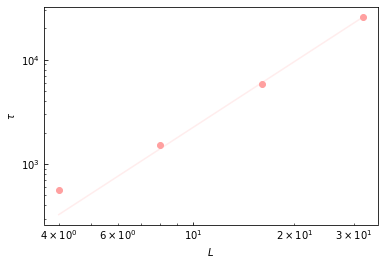

In [54]:
# U/t=10.0
fig,ax = plt.subplots()

# ax.errorbar(L,tau, yerr=tau_err, fmt='.', capsize=5,
#             label='',color=colors[0],mfc=colors_light[0],
#             marker='s',zorder=1)
ax.scatter(L,tau,color=colors[0],fc=colors[0])
ax.plot(L_fit,y_fit,color=colors_light[0],zorder=0)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel(r"$\tau$")
ax.set_xlabel(r"$L$")
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

# # Save to code repo (this repo)
# plt.savefig("../figures/relativeErrorsVK_N8.pdf",dpi=400)
# plt.savefig("../figures/relativeErrorsVK_N8.svg",dpi=400)

# # Save to paper repo
# plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/relativeErrorsVK_N8.pdf",dpi=400)
# plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/relativeErrorsVK_N8.svg",dpi=400)

In [55]:
print("exponent: %.4f +/- %.4f"%(c2,c2_err))
print("pre-factor: %.4f +/- %.4f"%(c1,c1_err))

print("\nτ(z) = %.4f*L^{%.4f}"%(c1,c2))

exponent: 2.0964 +/- 0.0429
pre-factor: 17.8838 +/- 2.6341

τ(z) = 17.8838*L^{2.0964}
